<a href="https://colab.research.google.com/github/mrbarokah/Python/blob/master/1_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**1. Import Library**

* VADER (Valence Aware Dictionary and sEntiment Reasoner) is a lexicon and rule-based sentiment analysis tool that is specifically attuned to sentiments expressed in social media.
Source : https://github.com/cjhutto/vaderSentiment




In [ ]:
# Install Library
!pip install vaderSentiment

* Pandas is an open source, BSD-licensed library providing high-performance, easy-to-use data structures and data analysis tools for the Python programming language.
* NLTK is a leading platform for building Python programs to work with human language data.

In [ ]:
# Import Library
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk

##**2. Import Data**

In [ ]:
# Import Data from Google Drive
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
df = pd.read_csv("/content/drive/My Drive/CHRYSLER/Chrysler_Senti.csv")

In [ ]:
# Import Data if Normal
df = pd.read_csv("/content/Tesat.csv")

In [ ]:
# Import Normal Data if UnicodeError Occured
df = pd.read_csv("/content/GM_15_22_FIX.csv", encoding = "ISO-8859-1")

In [ ]:
df.head(5)

In [ ]:
df.shape

#**3. PreProcessing**

###a. Remove Duplicate

In [ ]:
# Remove Duplicate Row from Table
df = df.drop_duplicates()
df.shape

(411637, 5)

###b. RemoveURL

In [ ]:
# Remove Duplicate from Selected Column
df['text'] = df['text'].str.replace('http\S+|www.\S+', '', case=False)

###c. LowerCasing

In [ ]:
# Merubah keseluruhan kalimat di kolom yang dipilih menjadi huruf kecil
df['text'] = df['text'].str.lower()

In [ ]:
df.text

###d. RemoveUsername (Optional)

In [ ]:
# Menghilangkan kata yang diawali oleh simbol @ pada kolom tertentu
df['text'] = df['text'].str.replace('@[^\s]+','', case=False)

###e. Tokenize (Optional)

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
#Testing
example_text = df.iloc[0]
print(nltk.word_tokenize(example_text['text']))

['retweet', 'selected', 'by', 'the', 'team', '|', 'glancy', 'prongay', '&', 'amp', ';', 'murray', 'llp', ':', 'announces', 'investigation', 'o…']


In [ ]:
def identify_tokens(row):
    text = row['text']
    tokens = nltk.word_tokenize(text)
    # taken only words (not punctuation)
    token_words = [w for w in tokens if w.isalpha()]
    return token_words

df['text'] = df.apply(identify_tokens, axis=1)

In [ ]:
df.text

0     [retweet, selected, by, the, team, glancy, pro...
1     [entering, the, last, year, of, his, first, te...
2     [rt, hornematt, not, a, good, look, for, toyot...
3     [just, not, with, the, honda, gang, anymore, a...
4     [having, issues, with, the, lighting, on, your...
5     [yes, yes, you, can, in, back, and, the, front...
6     [tesla, s, deal, with, could, pave, the, way, ...
7     [jibbyd, a, chrysler, though, could, ve, at, l...
8     [dotfuz, i, know, i, was, disappointed, in, th...
9     [good, thing, obama, saved, gm, and, chrysler,...
10    [retweet, selected, by, the, team, law, office...
11    [i, applied, for, a, lexus, and, didn, t, get,...
12    [i, worked, a, thing, called, rotating, sixes,...
13    [grand, central, and, chrysler, building, sony...
Name: text, dtype: object

###f. Stemming (Optional)

In [ ]:
from nltk.stem import PorterStemmer
stemming = PorterStemmer()

In [ ]:
my_list = ['frightening', 'frightened', 'frightens']
print ([stemming.stem(word) for word in my_list])

['frighten', 'frighten', 'frighten']


In [ ]:
def stem_list(row):
    my_list = row['text']
    stemmed_list = [stemming.stem(word) for word in my_list]
    return (stemmed_list)

df['stemmed_words'] = df.apply(stem_list, axis=1)

In [ ]:
df.text

0        [yes, i, have, a, pink, volkswagen, golf, real...
1                                    [oh, yeah, i, fw, it]
2                                        [okay, toosiiiii]
3        [vw, polo, tsi, is, the, best, hatchback, hand...
4          [absolutely, bang, on, seriously, looking, bro]
                               ...                        
17973                    [my, first, car, was, a, vw, bug]
17974                    [timestamp, for, posterity, tsla]
17975    [on, my, way, to, lisboa, and, a, big, thank, ...
17976    [ready, reposted, from, full, collection, of, ...
17977                                [in, musk, we, trust]
Name: text, Length: 17978, dtype: object

###g. Stopwords (Optional)

In [ ]:
nltk.download('stopwords')
from nltk.corpus import stopwords
stops = set(stopwords.words("english"))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
def remove_stops(row):
    text = row['text']
    meaningful_words = [w for w in text if not w in stops]
    return (meaningful_words)

df['text'] = df.apply(remove_stops, axis=1)

In [ ]:
#Joining Text
df['text'] = df['text'].str.join(" ")

In [ ]:
print(df['text'][0])

retweet selected team glancy prongay amp murray llp announces investigation


In [ ]:
df.head(2)

,created_at,screen_name,in_reply_to_screen_name,text,negative,neutral,positive,compound,stockprice,text_meaningful
0,1/15/2020,GFACCORD,NaN,retweet selected team glancy prongay amp murra...,0.0,1.0,0.0,0.0,12.472,retweet selected team glancy prongay amp murra...
1,1/15/2020,YourGoshenNews,NaN,entering last year first term governor eric ho...,0.0,1.0,0.0,0.0,12.472,entering last year first term governor eric ho...


###h. Special Character (Optional)

In [ ]:
import string

printable = set(string.printable)

def remove_spec_chars(in_str):
    return ''.join([c for c in in_str if c in printable])

data['text'].apply(remove_spec_chars)

0         live soon unranked to gm duo going dive @jonov...
1         @hopesisagod @amberessxnce aye bro with all du...
2         gm authority: worlds nicest 1985 cadillac sevi...
3         rt @brendanleister: sure hope whoever becomes ...
4                 @phdoldmanresea1 @valueanalyst1 gm and f?
                                ...                        
117811    twitter fucked up letting me react to things i...
117812    rt @ryanohalloran: updated: at senior bowl, #b...
117813    what cruises self-driving vehicle reveals abou...
117814                              ungrateful ass bitches 
117815    @initiativerole thats where a good gm can pay ...
Name: text, Length: 117816, dtype: object

#**4. Sentiment Analysis**

In [ ]:
#Change Title to String
df['text'] = df['text'].astype(str)

In [ ]:
# Import library for Text Analytics
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:
# Sentiment Analysis
sid = SentimentIntensityAnalyzer()
listy = [] 
for index, row in df.iterrows():
  df['text']
  ss = sid.polarity_scores(row['text'])
  listy.append(ss)
  
se = pd.Series(listy)
df['polarity'] = se.values
display(df.head(10))

###a. Visualization

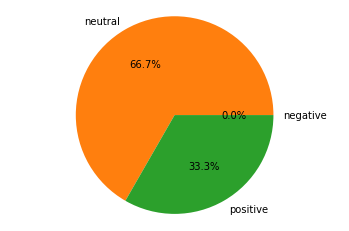

In [ ]:
# Pie Chart
import matplotlib.pyplot as plt
labels = ['negative', 'neutral', 'positive']
sizes  = [ss['neg'], ss['neu'], ss['pos']]
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.axis('equal') 
plt.show()

###b. Save to CSV

In [ ]:
df.to_csv('Chrysler_Senti.csv', index=False)